###**Лабораторная работа 2. Автокодировщик**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
num_classes = 2
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
(x_train_f, y_train_f), (x_test_f, y_test_f) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
y_train = [0] * y_train.shape[0]
y_test = [0] * y_test.shape[0]
y_train_f = [1] * y_train_f.shape[0]
y_test_f = [1] * y_test_f.shape[0]

In [ ]:
y_train.extend(y_train_f)
x_train = x_train.tolist()
x_train.extend(x_train_f)

y_test.extend(y_test_f)
x_test = x_test.tolist()
x_test.extend(x_test_f)

In [ ]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (120000, 28, 28, 1)
120000 train samples
20000 test samples


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = keras.Sequential([keras.Input(shape=input_shape),
                         layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                         layers.MaxPooling2D(pool_size=(2, 2)),
                         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                         layers.MaxPooling2D(pool_size=(2, 2)),
                         layers.Flatten(),
                         layers.Dropout(0.5),
                         layers.Dense(num_classes, activation="softmax"),])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

In [ ]:
batch_size = 2048
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
53/53 [==============================] - 66s 1s/step - loss: 0.2317 - accuracy: 0.8992 - val_loss: 0.0442 - val_accuracy: 0.9883
Epoch 2/10
53/53 [==============================] - 65s 1s/step - loss: 0.0198 - accuracy: 0.9951 - val_loss: 0.0131 - val_accuracy: 0.9973
Epoch 3/10
53/53 [==============================] - 65s 1s/step - loss: 0.0097 - accuracy: 0.9977 - val_loss: 0.0076 - val_accuracy: 0.9980
Epoch 4/10
53/53 [==============================] - 66s 1s/step - loss: 0.0064 - accuracy: 0.9983 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 5/10
53/53 [==============================] - 65s 1s/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.0020 - val_accuracy: 0.9998
Epoch 6/10
53/53 [==============================] - 66s 1s/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 7/10
53/53 [==============================] - 65s 1s/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0026 - val_accuracy: 0.9995
Epoch 8/10
53/53 [==

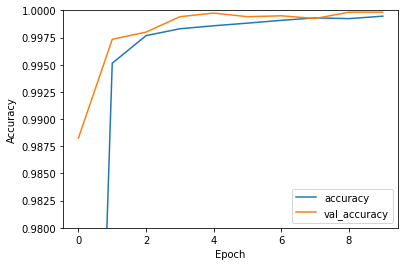

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.ylim([0.98, 1])
plt.legend(loc='lower right')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.001124349539168179
Test accuracy: 0.999750018119812
